In [41]:
# Importing pandas
import pandas as pd

# Importing SciPy
import scipy

# Importing seaborn for data visualization
import seaborn as sns

# Importing Scikit-learn for machine learning algorithms
from sklearn import datasets, model_selection, metrics

# Importing Matplotlib for plotting
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


## Extracting infromation from dataframe

In [42]:
df = pd.read_csv("TehranHouse.csv")

In [43]:
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


In [44]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

In [45]:
df.describe


<bound method NDFrame.describe of      Area  Room  Parking  Warehouse  Elevator             Address  \
0      63     1     True       True      True             Shahran   
1      60     1     True       True      True             Shahran   
2      79     2     True       True      True              Pardis   
3      95     2     True       True      True       Shahrake Qods   
4     123     2     True       True      True      Shahrake Gharb   
...   ...   ...      ...        ...       ...                 ...   
3474   86     2     True       True      True  Southern Janatabad   
3475   83     2     True       True      True            Niavaran   
3476   75     2    False      False     False              Parand   
3477  105     2     True       True      True              Dorous   
3478   82     2    False       True      True              Parand   

             Price  Price(USD)  
0     1.850000e+09    61666.67  
1     1.850000e+09    61666.67  
2     5.500000e+08    18333.33  
3    

## Encoding the categorical data of 'Parking', 'Warehouse', 'Elevator'

In [46]:
# Encoding 'Parking', 'Warehouse', and 'Elevator' columns from True/False to 1/0
df[['Parking', 'Warehouse', 'Elevator']] = df[['Parking', 'Warehouse', 'Elevator']].astype(int)

# Display the updated DataFrame
print(df.head())


  Area  Room  Parking  Warehouse  Elevator         Address         Price  \
0   63     1        1          1         1         Shahran  1.850000e+09   
1   60     1        1          1         1         Shahran  1.850000e+09   
2   79     2        1          1         1          Pardis  5.500000e+08   
3   95     2        1          1         1   Shahrake Qods  9.025000e+08   
4  123     2        1          1         1  Shahrake Gharb  7.000000e+09   

   Price(USD)  
0    61666.67  
1    61666.67  
2    18333.33  
3    30083.33  
4   233333.33  


## Handling Missing values

In [47]:
df.isna().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [48]:
df.dropna(inplace=True)

In [49]:
df.isna().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

## Handling duplicate values

In [50]:
df[df.duplicated]

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
55,61,1,1,1,0,Punak,2.030000e+09,67666.67
78,74,2,1,1,1,Amirieh,1.700000e+09,56666.67
79,88,3,0,0,1,Parand,5.600000e+08,18666.67
80,63,1,1,1,1,Punak,2.150000e+09,71666.67
81,114,3,1,1,1,Sattarkhan,5.500000e+09,183333.33
...,...,...,...,...,...,...,...,...
3449,80,2,1,1,1,Punak,3.760000e+09,125333.33
3451,88,2,1,1,1,Central Janatabad,4.000000e+09,133333.33
3459,80,2,1,1,1,Ostad Moein,2.250000e+09,75000.00
3461,55,1,1,1,1,Punak,2.300000e+09,76666.67


In [51]:
### there are no duplicates in our dataframe

## handling the Outliers

#### Using IQR

#### Using Z score

In [52]:
# Convert columns to numeric, forcing errors to NaN
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')
df['Room'] = pd.to_numeric(df['Room'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Price(USD)'] = pd.to_numeric(df['Price(USD)'], errors='coerce')

# Drop rows with NaN values resulting from non-numeric data
df = df.dropna(subset=['Area', 'Room', 'Price', 'Price(USD)'])

# Now perform IQR outlier detection

# Define the numerical columns
numerical_columns = ['Area', 'Room', 'Price', 'Price(USD)']

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the outlier range as 1.5 times the IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers (those below the lower bound or above the upper bound)
outliers = df[(df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)].any(axis=1)

# Display the outliers
print(df[outliers])


       Area  Room  Parking  Warehouse  Elevator                 Address  \
0      63.0     1        1          1         1                 Shahran   
1      60.0     1        1          1         1                 Shahran   
7      59.0     1        1          1         1                 Shahran   
9      71.0     1        1          1         1  West Ferdows Boulevard   
11     64.0     1        1          1         1                  Narmak   
...     ...   ...      ...        ...       ...                     ...   
3461   55.0     1        1          1         1                   Punak   
3462   60.0     1        1          1         1  West Ferdows Boulevard   
3463  133.0     3        1          0         1          Shahrake Gharb   
3472  113.0     3        1          1         1             Ostad Moein   
3473   63.0     1        1          1         0             Feiz Garden   

             Price  Price(USD)  
0     1.850000e+09    61666.67  
1     1.850000e+09    61666.67  


In [53]:
from scipy import stats

# Z-score calculation
z_scores = stats.zscore(df[numerical_columns])

# Set a threshold for outliers (e.g., Z-score > 3 or < -3)
outliers = (z_scores > 3) | (z_scores < -3)

# Display the rows containing outliers
print(df[outliers.any(axis=1)])


       Area  Room  Parking  Warehouse  Elevator      Address         Price  \
190   320.0     4        1          1         1  Saadat Abad  2.400000e+10   
201   270.0     4        1          1         1    Farmanieh  3.780000e+10   
284   450.0     2        1          1         0       Absard  4.200000e+09   
285   500.0     2        1          1         0       Absard  3.900000e+09   
330   350.0     3        1          1         1   Zaferanieh  5.250000e+10   
...     ...   ...      ...        ...       ...          ...           ...   
3194  145.0     5        0          0         0      Jeyhoon  5.000000e+09   
3201  133.0     5        0          0         0      Jeyhoon  4.700000e+09   
3243  210.0     3        1          1         1    Farmanieh  3.360000e+10   
3254  240.0     3        1          1         0      Elahieh  3.456000e+10   
3288  160.0     5        1          1         0  Yousef Abad  1.800000e+10   

      Price(USD)  
190    800000.00  
201   1260000.00  
284   

####  Vizualising it

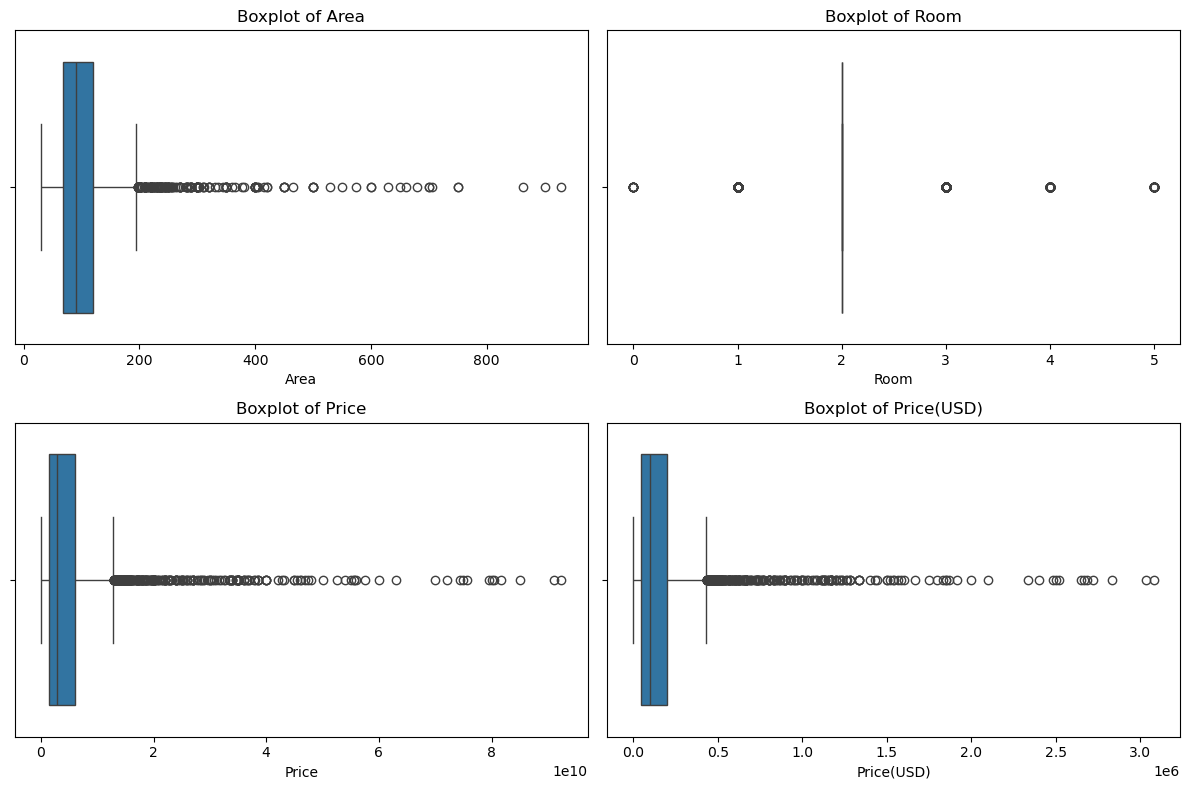

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for each numerical column
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


### Removing the outliers

In [55]:
# Convert columns to numeric, forcing errors to NaN
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')
df['Room'] = pd.to_numeric(df['Room'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Price(USD)'] = pd.to_numeric(df['Price(USD)'], errors='coerce')

# Drop rows with NaN values resulting from non-numeric data
df = df.dropna(subset=['Area', 'Room', 'Price', 'Price(USD)'])

# Define the numerical columns
numerical_columns = ['Area', 'Room', 'Price', 'Price(USD)']

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the outlier range as 1.5 times the IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Keep rows where values are within the bounds (not outliers)
df_no_outliers = df[~((df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)).any(axis=1)]

# Display the cleaned dataframe without outliers
print(df_no_outliers)


       Area  Room  Parking  Warehouse  Elevator                     Address  \
2      79.0     2        1          1         1                      Pardis   
3      95.0     2        1          1         1               Shahrake Qods   
4     123.0     2        1          1         1              Shahrake Gharb   
5      70.0     2        1          1         0  North Program Organization   
6      87.0     2        1          1         1                      Pardis   
...     ...   ...      ...        ...       ...                         ...   
3474   86.0     2        1          1         1          Southern Janatabad   
3475   83.0     2        1          1         1                    Niavaran   
3476   75.0     2        0          0         0                      Parand   
3477  105.0     2        1          1         1                      Dorous   
3478   82.0     2        0          1         1                      Parand   

             Price  Price(USD)  
2     5.500000e+08

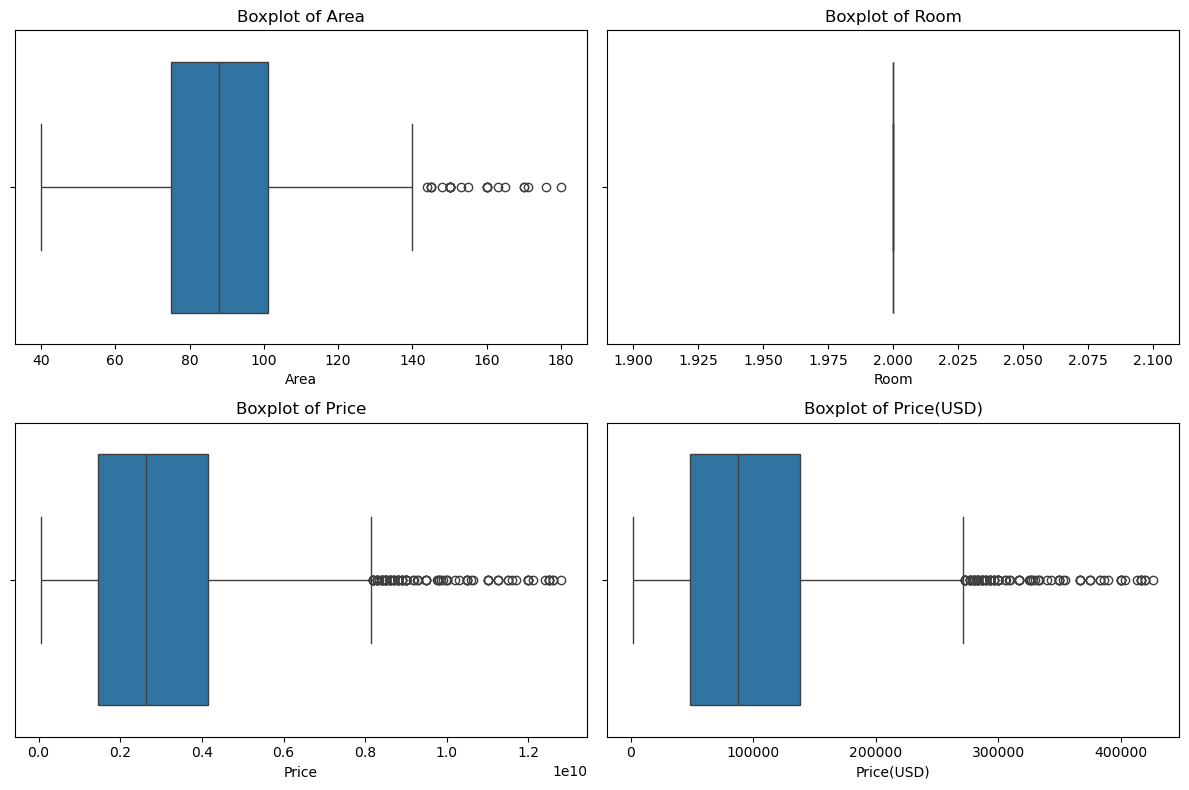

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


## Performing univariate analyis

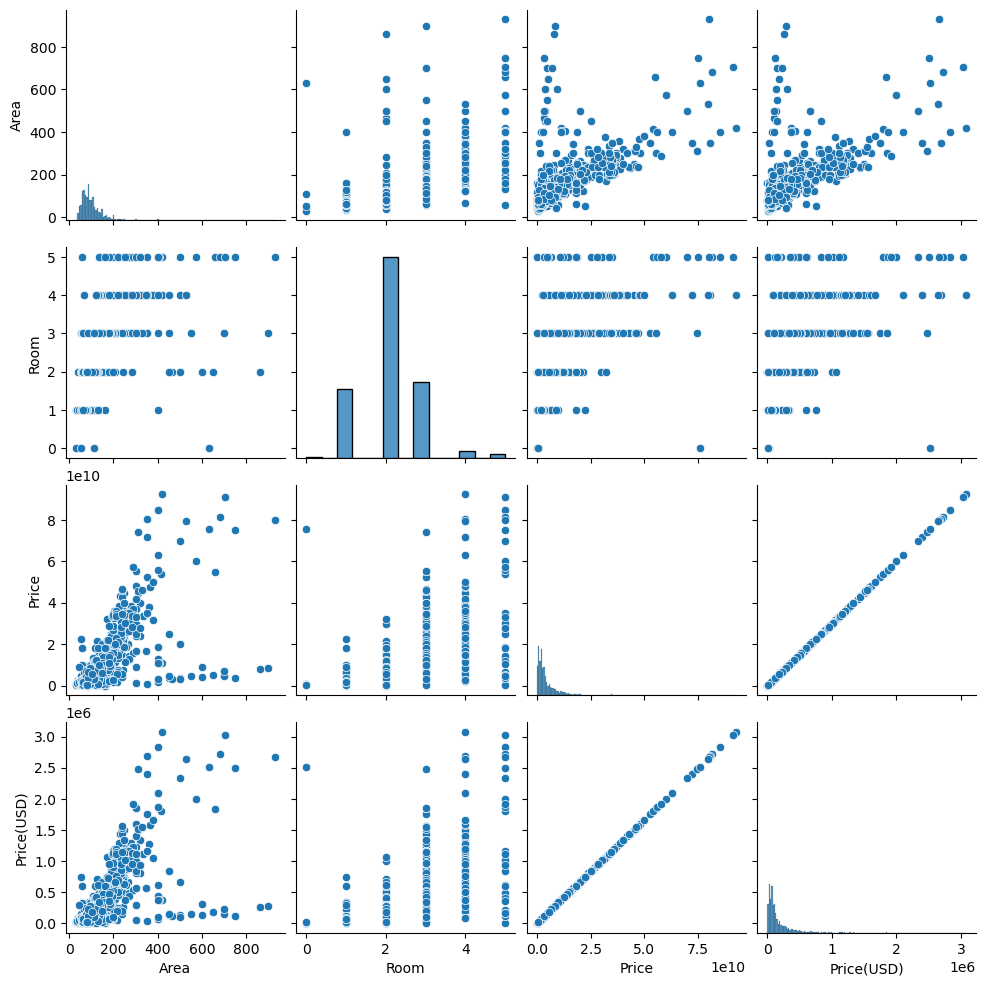

In [62]:
# Convert columns to numeric to avoid issues with plotting
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')
df['Room'] = pd.to_numeric(df['Room'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Price(USD)'] = pd.to_numeric(df['Price(USD)'], errors='coerce')

# Drop rows with NaN values
df_cleaned = df.dropna(subset=['Area', 'Room', 'Price', 'Price(USD)'])

# Define the numerical columns
numerical_columns = ['Area', 'Room', 'Price', 'Price(USD)']

# Step 1: Pairplot to visualize pairwise relationships between all numerical columns
sns.pairplot(df_cleaned[numerical_columns])
plt.show()



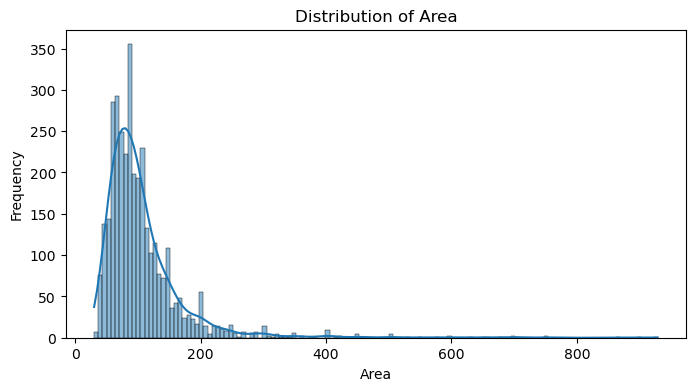

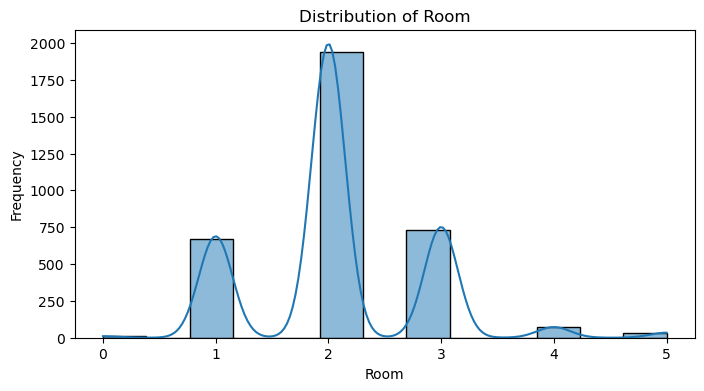

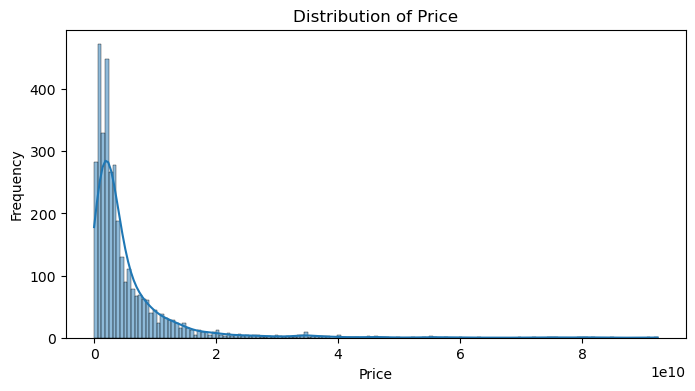

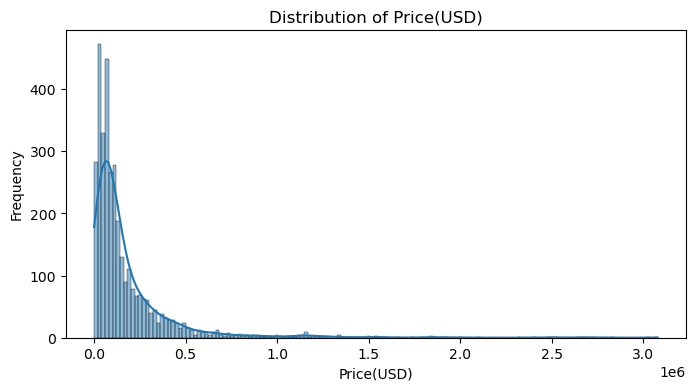

In [63]:

# Step 2: Histograms for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_cleaned[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


#### Bivariate analysis of numerical columns with the target column price

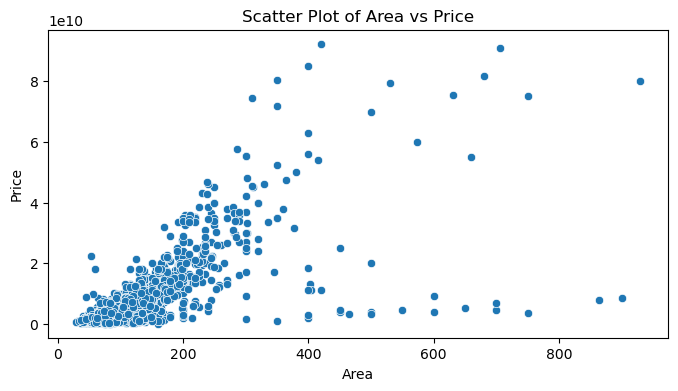

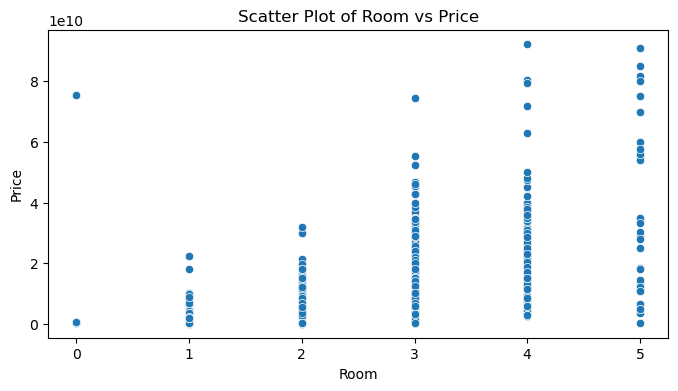

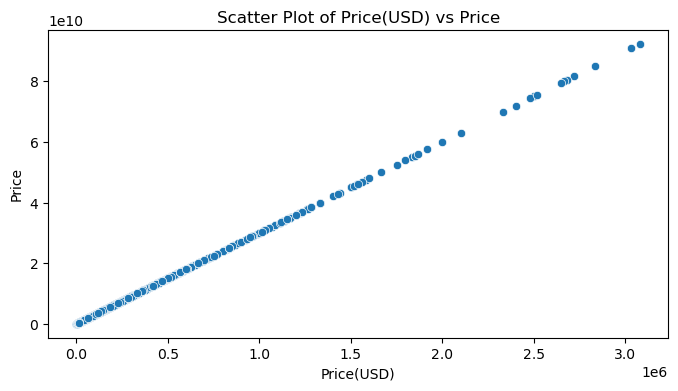

In [66]:
# List of numerical columns excluding 'Price'
numerical_columns = ['Area', 'Room', 'Price(USD)']

# Step 1: Scatter plots for numerical columns vs. Price
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=df_cleaned[col], y=df_cleaned['Price'])
    plt.title(f'Scatter Plot of {col} vs Price')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

In [86]:
import pandas as pd

# Assuming df is your DataFrame
correlation_matrix = df.corr()


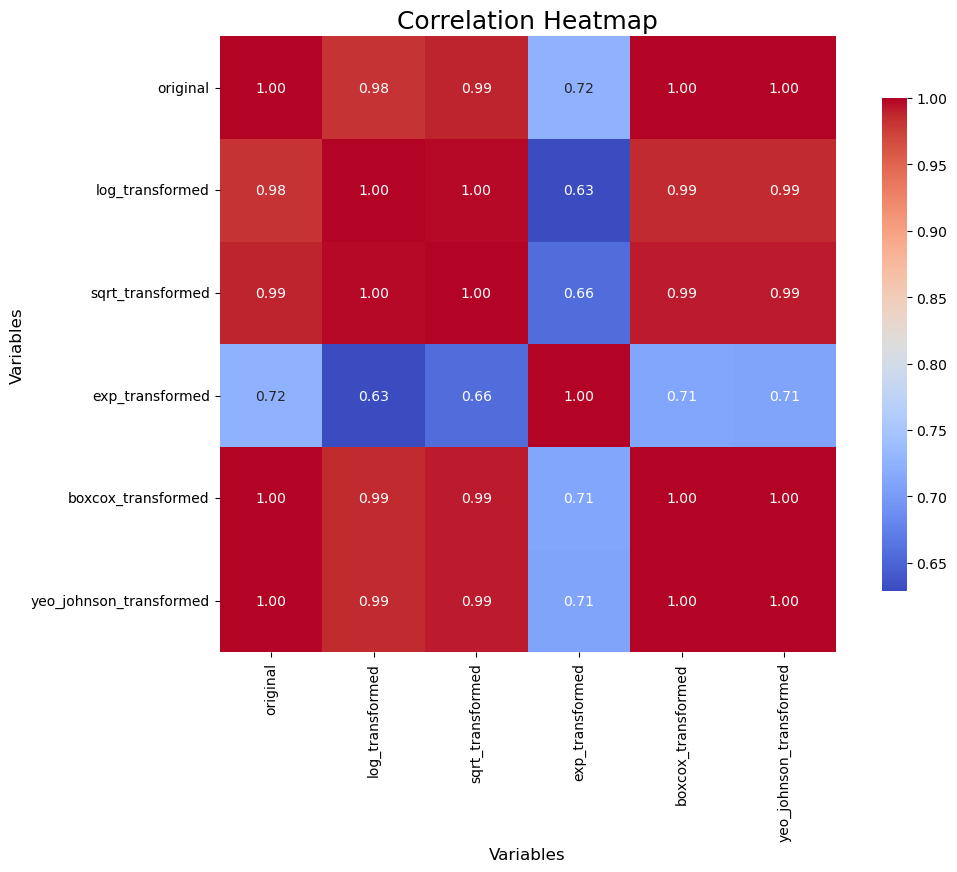

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap with a blue-to-red color gradient
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink': .8})

# Add titles and labels
plt.title('Correlation Heatmap', fontsize=18)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Variables', fontsize=12)

# Show the heatmap
plt.show()


### Bivariate analysis of categorica lcolumns with the target column price

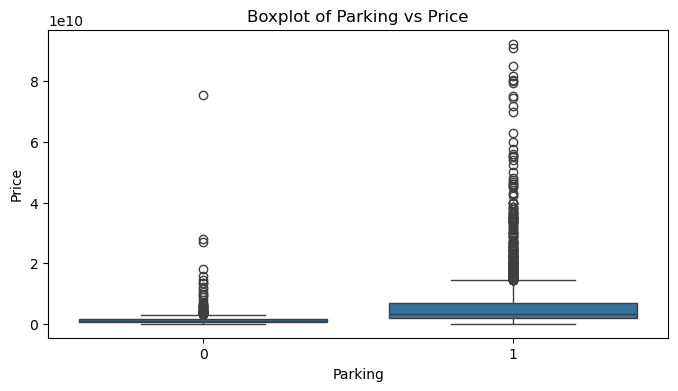

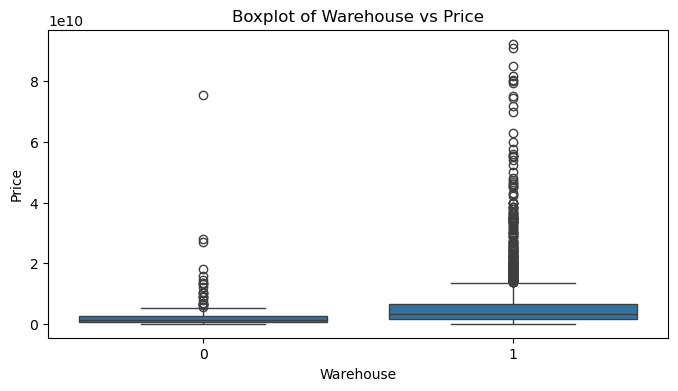

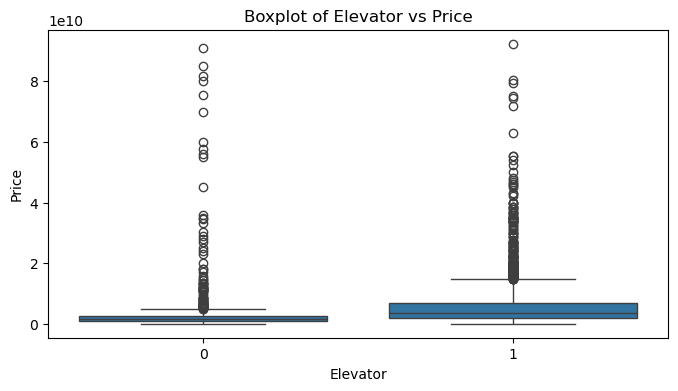

In [68]:
# List of categorical columns to analyze
categorical_columns = ['Parking', 'Warehouse', 'Elevator']

# Step 1: Boxplot for each categorical feature vs. Price
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_cleaned[col], y=df_cleaned['Price'])
    plt.title(f'Boxplot of {col} vs Price')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()



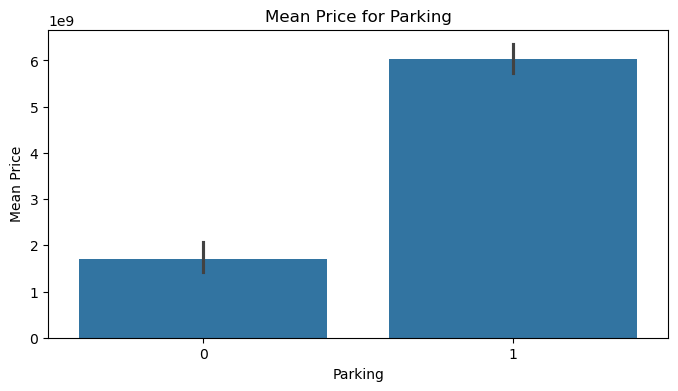

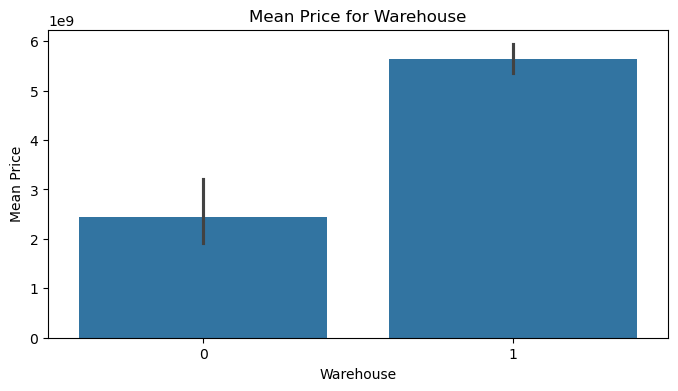

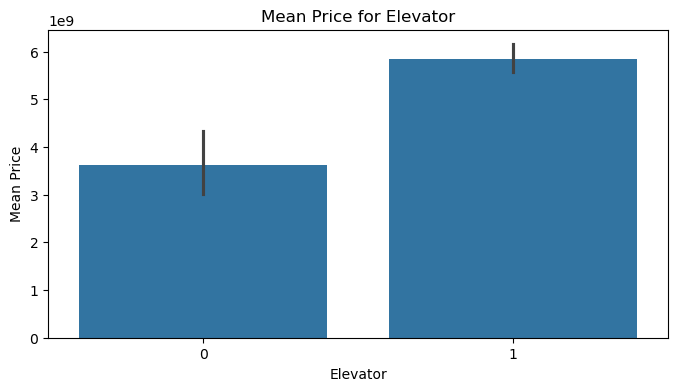

In [69]:

# Step 2: Bar plot showing mean Price for each category
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.barplot(x=df_cleaned[col], y=df_cleaned['Price'])
    plt.title(f'Mean Price for {col}')
    plt.xlabel(col)
    plt.ylabel('Mean Price')
    plt.show()

###  Applying transformations

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [79]:
# Generating random data for demonstration purposes
np.random.seed(42)
data = np.random.normal(loc=0, scale=1, size=1000)  # Normal distribution


In [80]:
# Apply exponential transformation
exp_transformed = np.exp(data)

# Optional: Convert to Pandas Series for easier handling
exp_transformed_series = pd.Series(exp_transformed)


In [82]:
# Remove any infinite or NaN values
exp_transformed_clean = exp_transformed_series[np.isfinite(exp_transformed_series)]


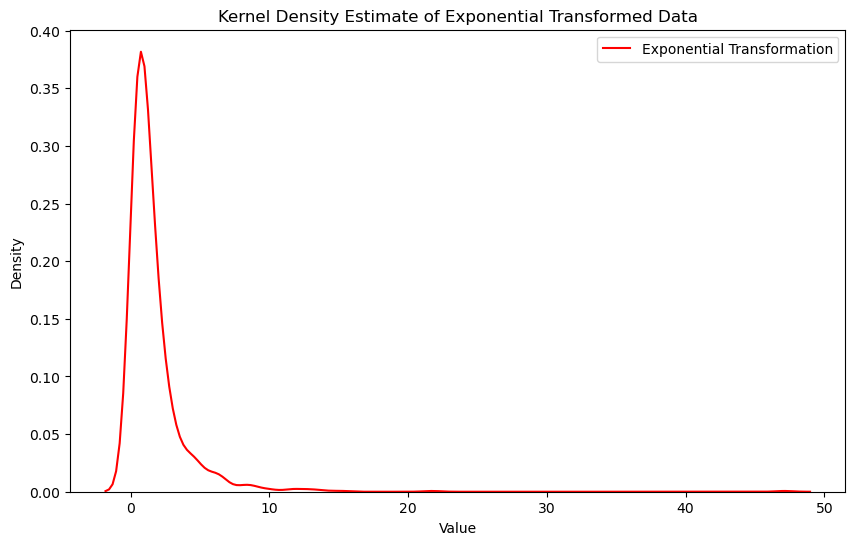

In [83]:
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
sns.kdeplot(exp_transformed_clean, color='red', label='Exponential Transformation')
plt.title('Kernel Density Estimate of Exponential Transformed Data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


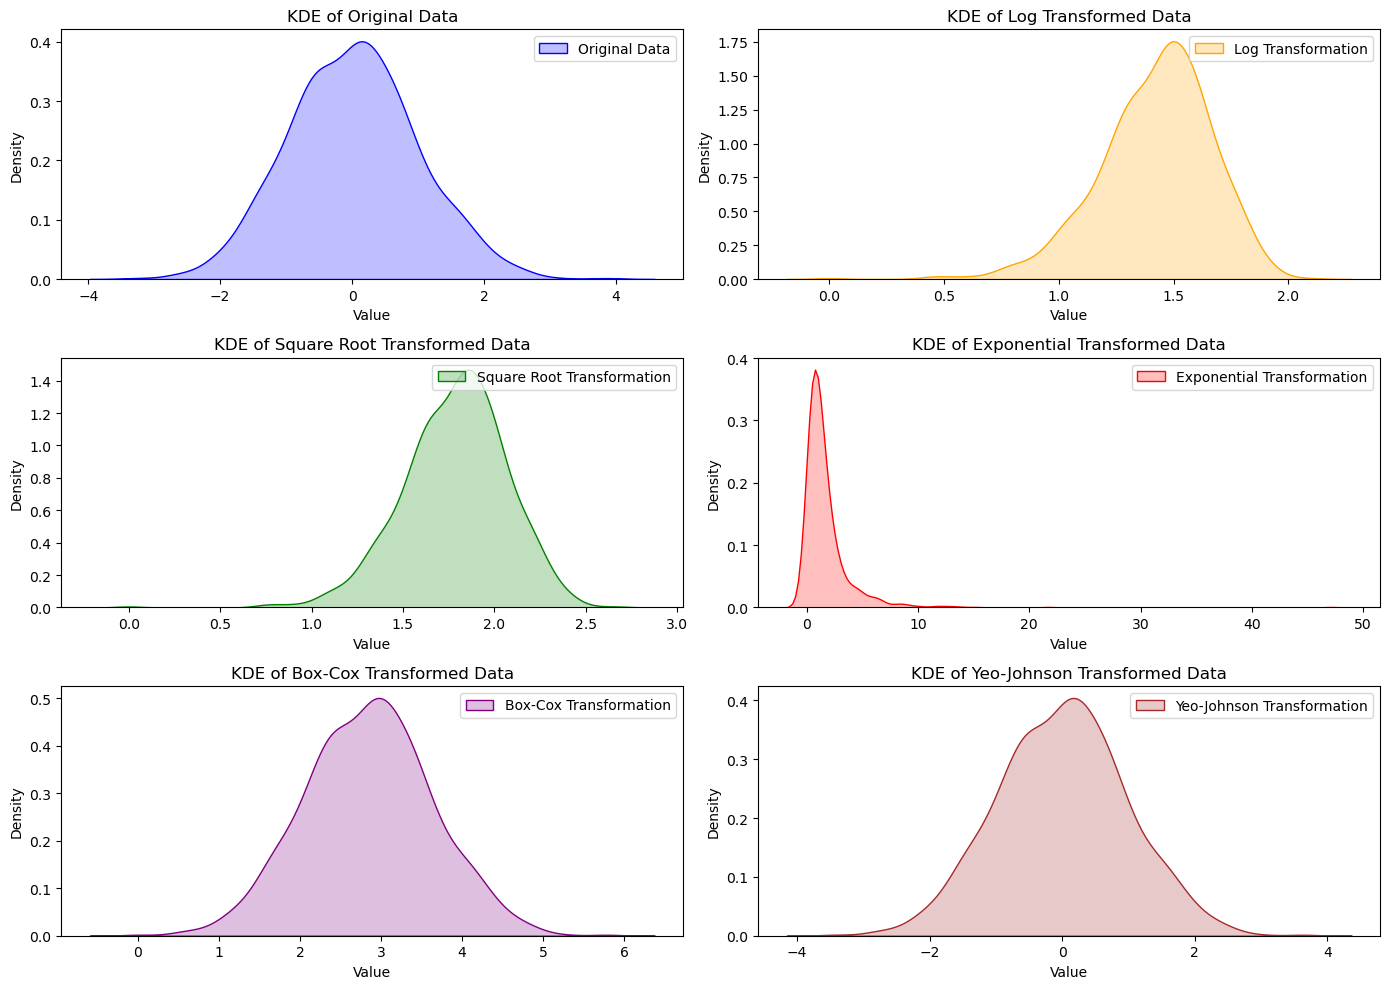

In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Step 1: Create Sample Data
np.random.seed(42)
data = np.random.normal(loc=0, scale=1, size=1000)  # Normal distribution

# Step 2: Prepare DataFrame
df = pd.DataFrame(data, columns=['original'])

# Step 3: Apply Transformations
# Log Transformation (adding a small constant to avoid log(0))
df['log_transformed'] = np.log(df['original'] - df['original'].min() + 1)

# Square Root Transformation
df['sqrt_transformed'] = np.sqrt(df['original'] - df['original'].min())

# Exponential Transformation
df['exp_transformed'] = np.exp(df['original'])

# Box-Cox Transformation (only for positive values)
df['boxcox_transformed'], _ = stats.boxcox(df['original'] - df['original'].min() + 1)

# Yeo-Johnson Transformation
df['yeo_johnson_transformed'], _ = stats.yeojohnson(df['original'])

# Step 4: Plot the KDEs
plt.figure(figsize=(14, 10))

# Original Data
plt.subplot(3, 2, 1)
sns.kdeplot(df['original'], color='blue', fill=True, label='Original Data')
plt.title('KDE of Original Data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Log Transformation
plt.subplot(3, 2, 2)
sns.kdeplot(df['log_transformed'], color='orange', fill=True, label='Log Transformation')
plt.title('KDE of Log Transformed Data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Square Root Transformation
plt.subplot(3, 2, 3)
sns.kdeplot(df['sqrt_transformed'], color='green', fill=True, label='Square Root Transformation')
plt.title('KDE of Square Root Transformed Data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Exponential Transformation
plt.subplot(3, 2, 4)
sns.kdeplot(df['exp_transformed'], color='red', fill=True, label='Exponential Transformation')
plt.title('KDE of Exponential Transformed Data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Box-Cox Transformation
plt.subplot(3, 2, 5)
sns.kdeplot(df['boxcox_transformed'], color='purple', fill=True, label='Box-Cox Transformation')
plt.title('KDE of Box-Cox Transformed Data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Yeo-Johnson Transformation
plt.subplot(3, 2, 6)
sns.kdeplot(df['yeo_johnson_transformed'], color='brown', fill=True, label='Yeo-Johnson Transformation')
plt.title('KDE of Yeo-Johnson Transformed Data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


### Using various statistical tests

##### T - TEST

In [88]:
from scipy.stats import ttest_ind

# Example of T-Test between two groups (e.g., original vs. log transformed)
stat, p = ttest_ind(df['original'].dropna(), df['log_transformed'].dropna())
print(f'T-Test between Original and Log Transformed: Statistics={stat:.3f}, p-value={p:.3f}')


T-Test between Original and Log Transformed: Statistics=-43.912, p-value=0.000


### Anova

In [89]:
from scipy.stats import f_oneway

# Example of ANOVA between multiple columns
anova_results = f_oneway(df['original'].dropna(), df['log_transformed'].dropna(), df['sqrt_transformed'].dropna())
print(f'ANOVA Test: Statistics={anova_results.statistic:.3f}, p-value={anova_results.pvalue:.3f}')


ANOVA Test: Statistics=2367.490, p-value=0.000
